With some trained models i'll try to improve precision

/home/jappa/PycharmProjects/SpaceAppsExoplanets/.venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/home/jappa/PycharmProjects/SpaceAppsExoplanets/.venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/home/jappa/PycharmProjects/SpaceAppsExoplanets/.venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_p

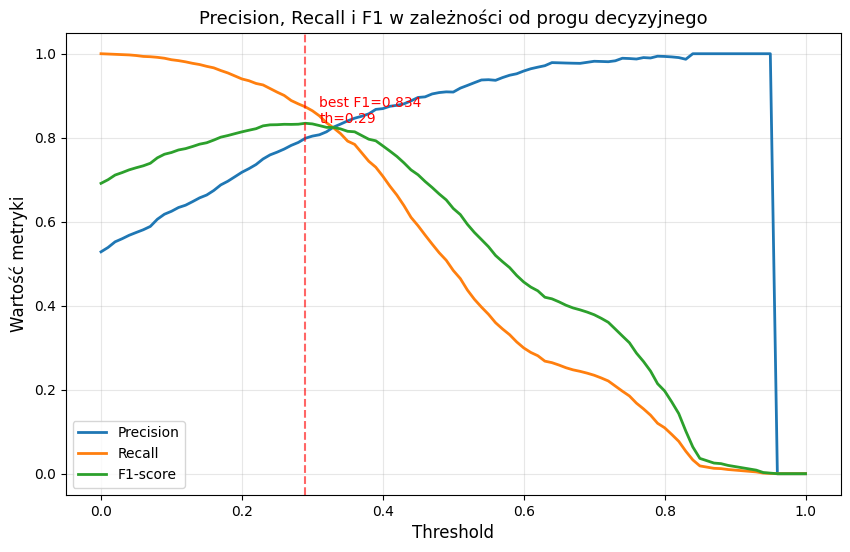

Optymalny próg dla F1: 0.29


/home/jappa/PycharmProjects/SpaceAppsExoplanets/.venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])


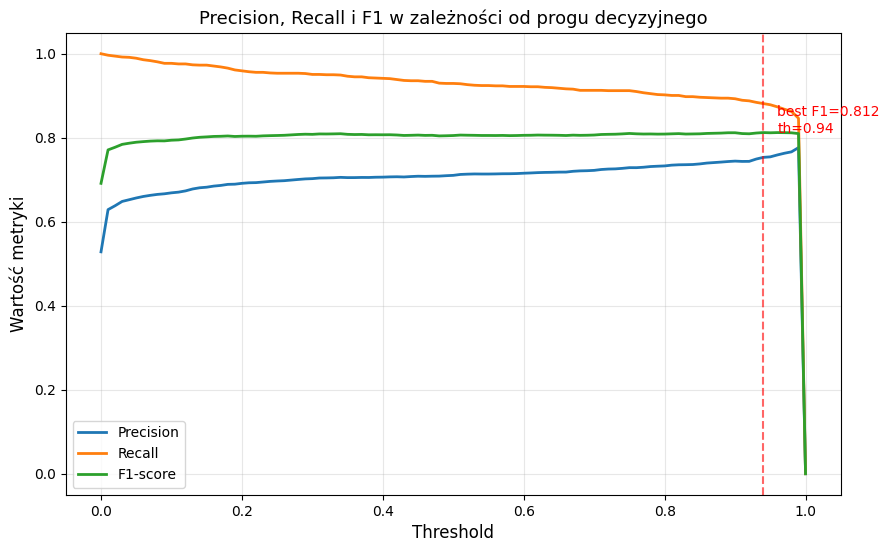

Optymalny próg dla F1: 0.94


/home/jappa/PycharmProjects/SpaceAppsExoplanets/.venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/home/jappa/PycharmProjects/SpaceAppsExoplanets/.venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/home/jappa/PycharmProjects/SpaceAppsExoplanets/.venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_p

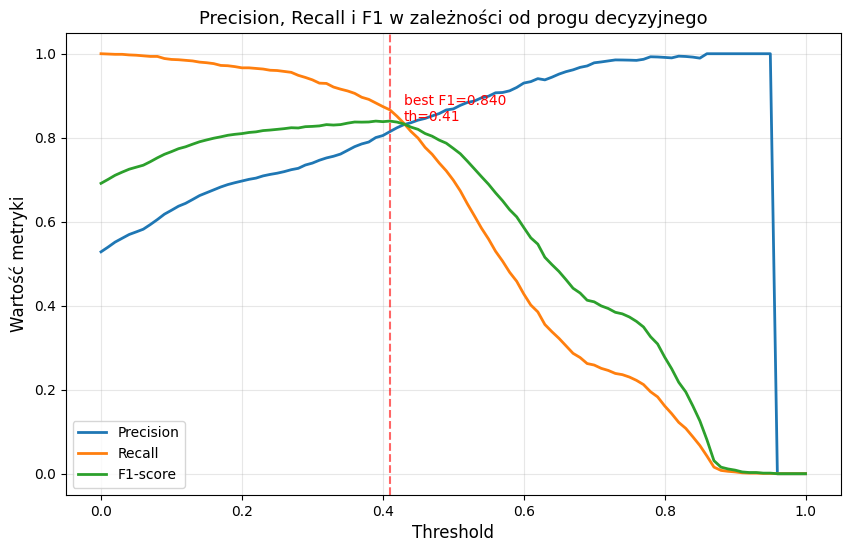

Optymalny próg dla F1: 0.41


In [10]:
from matplotlib import pyplot as plt
from sklearn.metrics import precision_score, recall_score, f1_score
import pandas as pd
import numpy as np
import joblib
from fontTools.misc.classifyTools import Classifier
from sklearn.base import BaseEstimator, ClassifierMixin

from sklearn.metrics import precision_score, recall_score, f1_score

y_test = pd.read_csv("datasets/y_test.csv",  index_col=0)["label"]
X_test = pd.read_csv("datasets/X_test_imputed_scaled.csv",  index_col=0)


rf = joblib.load("optimal_rf.pkl")
svc= joblib.load("optimal_svc.pkl")
voting = joblib.load("optimal_voting_rf_svc.pkl")

def threshold_check(model, X, y):
    y_proba = model.predict_proba(X)[:, 1]  # używamy danych
    thresholds = np.linspace(0.0, 1.0, 101)
    precisions, recalls, f1s = [], [], []

    for t in thresholds:
        y_pred_t = (y_proba >= t).astype(int)
        precisions.append(precision_score(y, y_pred_t))
        recalls.append(recall_score(y, y_pred_t))
        f1s.append(f1_score(y, y_pred_t))

    # --- Rysujemy wykres raz, po całej pętli ---
    plt.figure(figsize=(10, 6))
    plt.plot(thresholds, precisions, label='Precision', linewidth=2)
    plt.plot(thresholds, recalls, label='Recall', linewidth=2)
    plt.plot(thresholds, f1s, label='F1-score', linewidth=2)

    # Najlepszy punkt (max F1)
    best_idx = np.argmax(f1s)
    best_t = thresholds[best_idx]
    plt.axvline(best_t, color='red', linestyle='--', alpha=0.6)
    plt.text(best_t + 0.02, f1s[best_idx], f"best F1={f1s[best_idx]:.3f}\nth={best_t:.2f}", color='red')

    plt.title("Precision, Recall i F1 w zależności od progu decyzyjnego", fontsize=13)
    plt.xlabel("Threshold", fontsize=12)
    plt.ylabel("Wartość metryki", fontsize=12)
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.show()

    print(f"Optymalny próg dla F1: {best_t:.2f}")


threshold_check(rf, X_test, y_test)
threshold_check(svc, X_test, y_test)
threshold_check(voting, X_test, y_test)

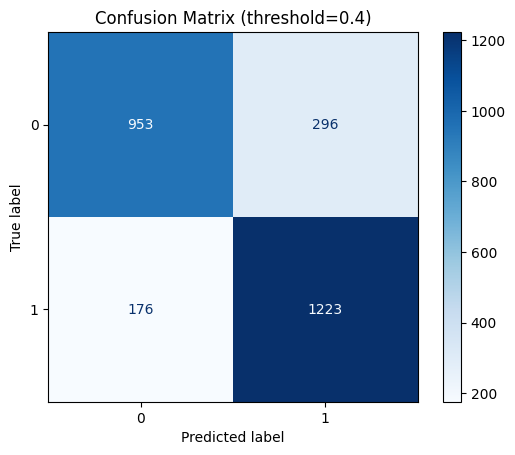

Threshold=0.40  Precision=0.805  Recall=0.874  F1=0.838


In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, ConfusionMatrixDisplay

def confusion_at_threshold(model, X, y, threshold=0.5, show_metrics=True, plot=True):
    """
    Pokazuje macierz pomyłek i metryki dla danego progu decyzyjnego.

    Parameters:
    - model: wytrenowany klasyfikator (RandomForest, SVC(probability=True), VotingClassifier)
    - X: dane testowe
    - y: prawdziwe etykiety
    - threshold: próg decyzyjny dla klasy pozytywnej
    - show_metrics: czy wypisać precision/recall/F1
    - plot: czy narysować macierz pomyłek
    """

    # Predykcja prawdopodobieństw klasy 1
    y_proba = model.predict_proba(X)[:, 1]

    # Prog decyzyjny
    y_pred = (y_proba >= threshold).astype(int)

    # Macierz pomyłek
    cm = confusion_matrix(y, y_pred)

    if plot:
        disp = ConfusionMatrixDisplay(confusion_matrix=cm)
        disp.plot(cmap=plt.cm.Blues)
        plt.title(f"Confusion Matrix (threshold={threshold})")
        plt.show()

    if show_metrics:
        precision = precision_score(y, y_pred, zero_division=0)
        recall = recall_score(y, y_pred, zero_division=0)
        f1 = f1_score(y, y_pred, zero_division=0)
        print(f"Threshold={threshold:.2f}  Precision={precision:.3f}  Recall={recall:.3f}  F1={f1:.3f}")

    return cm

# --- Przykład użycia ---
cm = confusion_at_threshold(voting, X_test, y_test, threshold=0.4)